In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

In [77]:
data = pd.read_csv('data.csv')

Function for scores and ROC curve with corss-validation

In [78]:
def scores(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

In [79]:
class_names = ['Breast Cancer Deaths',
    'COVID-19 Deaths',
    'Cardiovascular Disease Deaths',
    'Diabetes Deaths',
    'Drug Overdose Deaths',
    'Firearm Deaths',
    'HIV-Related Deaths',
    'Heart Disease Deaths',
    'Infant Deaths',
    'Injury Deaths',
    'Lung Cancer Deaths',
    'Maternal Deaths',
    'Motor Vehicle Deaths',
    'Opioid Overdose Deaths',
    'Pneumonia or Influenza Deaths',
    ]

In [80]:
def perso_roc(test, X, y, class_names):
    y_pred_proba_cv = cross_val_predict(test, X, y, cv=15, method='predict_proba')

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(class_names)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y == i).astype(int), y_pred_proba_cv[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    colors = plt.cm.get_cmap('tab10', n_classes)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors(i), label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - OvR')
    plt.legend(loc='lower right')


### Feature Selection with Correlation based method

In [81]:
corr_matrix = data.corr()

In [82]:
correlation_with_target = corr_matrix['metric_item_label'].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[:15].index.tolist()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

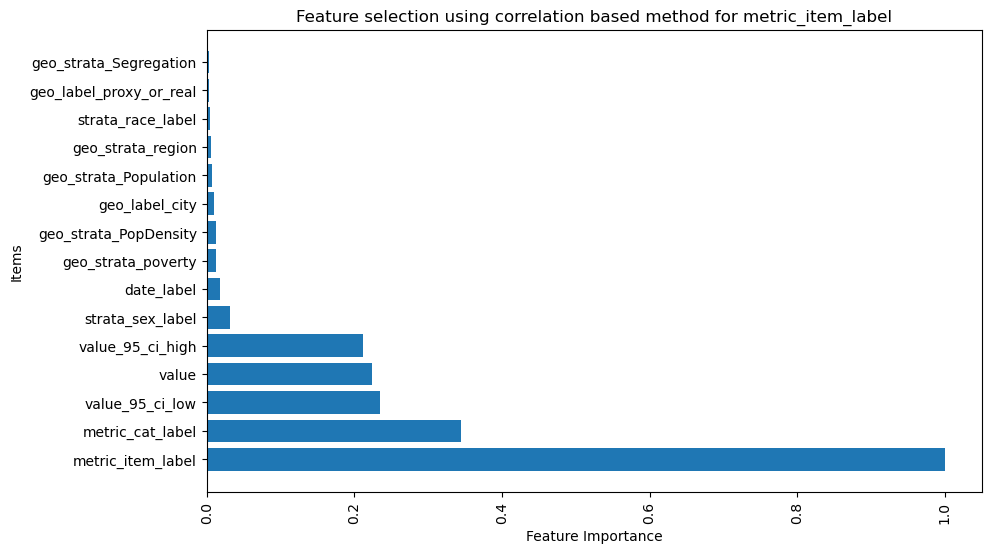

In [83]:
plt.figure(figsize=(10, 6))
plt.barh(selected_features_corr, correlation_with_target[selected_features_corr])
plt.xlabel('Feature Importance')
plt.ylabel('Items')
plt.title('Feature selection using correlation based method for metric_item_label')
plt.xticks(rotation=90)

Selected the 25 best features

In [84]:
selected_features_corr = data[selected_features_corr].columns.tolist()

### Random Forest Model

In [85]:
X = data[selected_features_corr]
y = data['metric_item_label']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Changing Hyperparamters

In [87]:
RF = RandomForestClassifier(n_estimators=50, max_depth=20, max_samples=15)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

In [88]:
y_pred_proba_rf = RF.predict_proba(X_test) 
auc_RF = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovo')

In [89]:
accuracy_RF, precision_RF, recall_RF, f1_RF = scores(y_test, y_pred_RF)

print(f"Accuracy: {accuracy_RF}")
print(f"Precision: {precision_RF}")
print(f"Recall: {recall_RF}")
print(f"F1 Score: {f1_RF}")

Accuracy: 0.7272
Precision: 0.7272467042470335
Recall: 0.7272
F1 Score: 0.6980251405859195


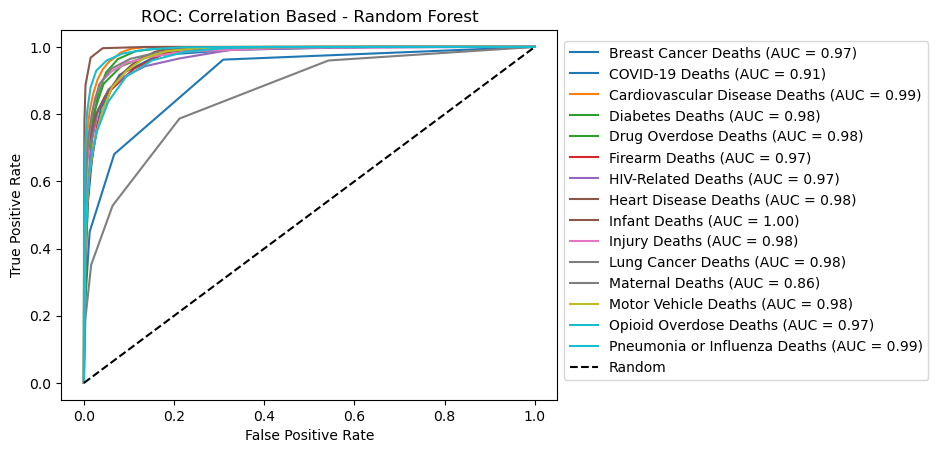

In [90]:
perso_roc(RF, X, y, class_names)
plt.title('ROC: Correlation Based - Random Forest')
plt.legend(bbox_to_anchor=(1, .99), loc='upper left')


### Logistic Regression Model

In [91]:
LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=30, penalty='l2')

In [92]:
LogReg.fit(X_train, y_train)
y_pred_LogReg = LogReg.predict(X_test)

In [93]:
y_pred_proba_LR = LogReg.predict_proba(X_test) 
auc_LogReg = roc_auc_score(y_test, y_pred_proba_LR, multi_class='ovr')


In [94]:
accuracy_LogReg, precision_LogReg, recall_LogReg, f1_LogReg = scores(y_test, y_pred_LogReg)

print(f"Accuracy: {accuracy_LogReg}")
print(f"Precision: {precision_LogReg}")
print(f"Recall: {recall_LogReg}")
print(f"F1 Score: {f1_LogReg}")

Accuracy: 0.5122
Precision: 0.4510356611301831
Recall: 0.5122
F1 Score: 0.4559094903870898


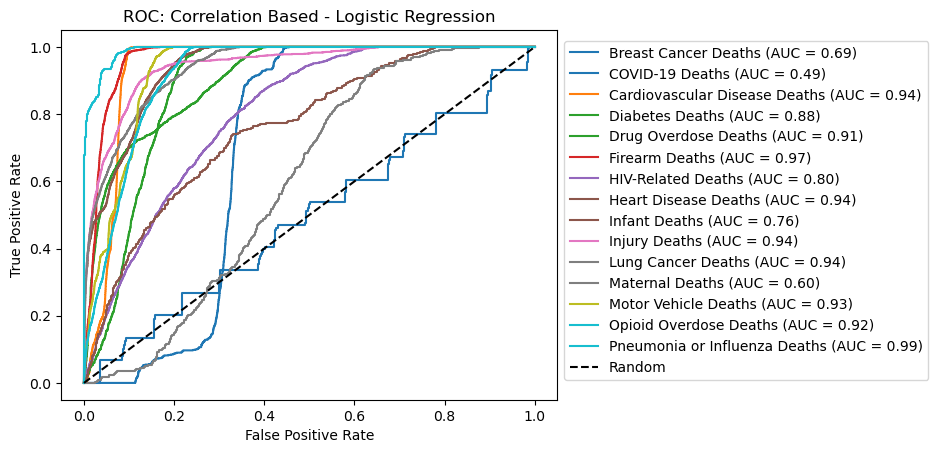

In [95]:
perso_roc(LogReg, X, y, class_names)
plt.title('ROC: Correlation Based - Logistic Regression')
plt.legend(bbox_to_anchor=(1, .99), loc='upper left')


### Decision Tree Model

In [96]:
DT = DecisionTreeClassifier(max_depth=7, min_samples_split=10, max_features=3)
DT.fit(X_train ,y_train)

y_pred_DT = DT.predict(X_test)

In [97]:
y_pred_proba_DT = DT.predict_proba(X_test) 
auc_DT = roc_auc_score(y_test, y_pred_proba_DT, multi_class='ovr')

In [98]:
accuracy_DT, precision_DT, recall_DT, f1_DT = scores(y_test, y_pred_DT)

print(f"Accuracy: {accuracy_DT}")
print(f"Precision: {precision_DT}")
print(f"Recall: {recall_DT}")
print(f"F1 Score: {f1_DT}")

Accuracy: 0.5534
Precision: 0.6339547790641971
Recall: 0.5534
F1 Score: 0.5063366184422513


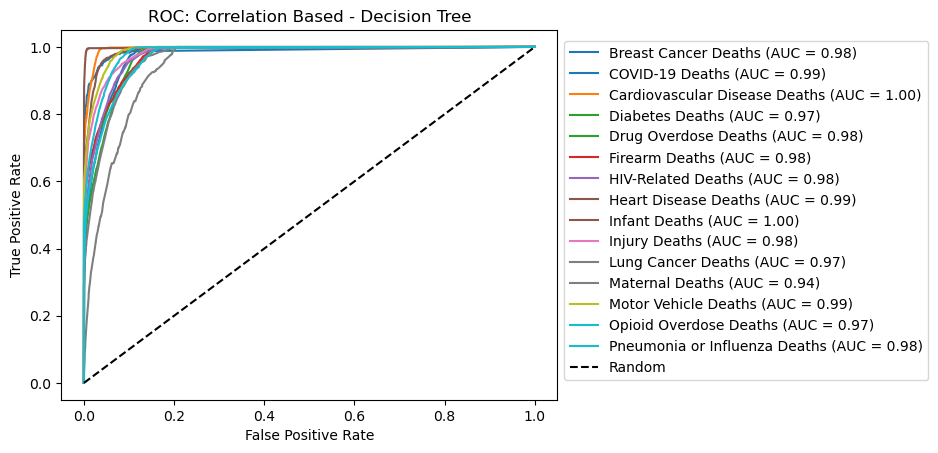

In [99]:
perso_roc(DT, X, y, class_names)
plt.title('ROC: Correlation Based - Decision Tree')
plt.legend(bbox_to_anchor=(1, .99), loc='upper left')


### Using KNN model

In [100]:
knn = KNeighborsClassifier(n_neighbors=7000, algorithm='ball_tree')


In [101]:
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

y_pred_proba_knn = knn.predict_proba(X_test) 

auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')

In [102]:
accuracy_knn, precision_knn, recall_knn, f1_knn = scores(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")


Accuracy: 0.2796
Precision: 0.18016796864649
Recall: 0.2796
F1 Score: 0.13682032913117367


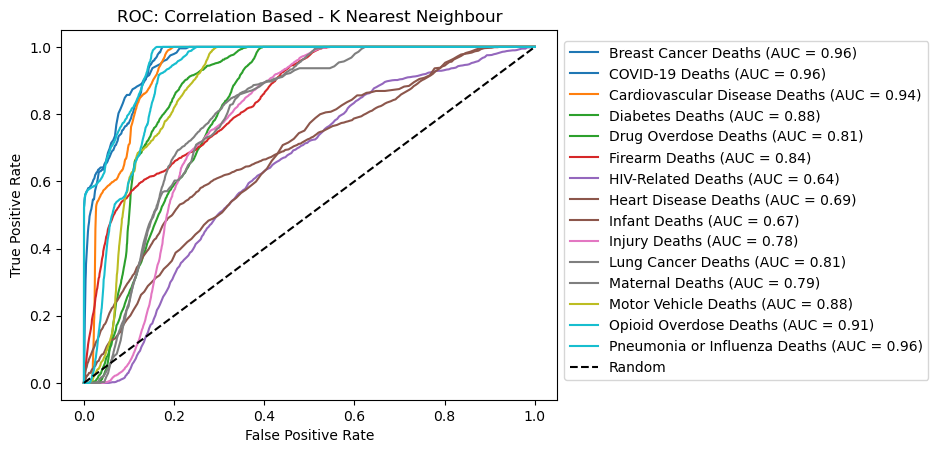

In [103]:
perso_roc(knn, X, y, class_names)
plt.title('ROC: Correlation Based - K Nearest Neighbour')
plt.legend(bbox_to_anchor=(1, .99), loc='upper left')


### Scores

In [104]:
model_names = ['RF', 'LogReg', 'KNN', 'DT']
accuracy_scores = [accuracy_RF, accuracy_LogReg, accuracy_knn, accuracy_DT]
precision_scores = [precision_RF, precision_LogReg, precision_knn, precision_DT]
recall_scores = [recall_RF, recall_LogReg, recall_knn, recall_DT]
f1_scores = [f1_RF, f1_LogReg, f1_knn, f1_DT]

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

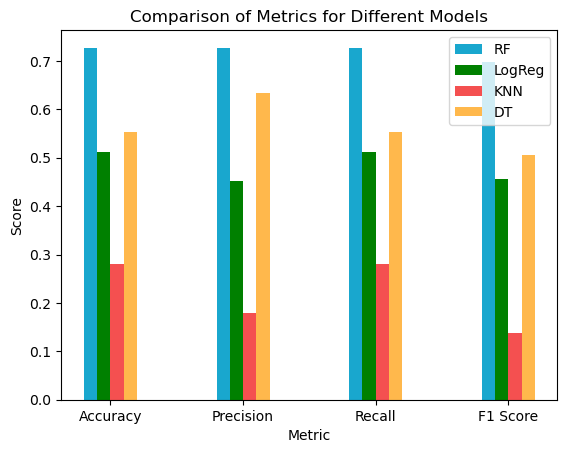

In [105]:
x = np.arange(len(metric_names))

bar_width = 0.1

color_map = {'RF': '#19A7CE', 'LogReg': 'green', 'KNN': '#F45050', 'DT': '#FFB84C'}

fig, ax = plt.subplots()

for i, model_name in enumerate(model_names):
    model_scores = [accuracy_scores[i], precision_scores[i], recall_scores[i], f1_scores[i]]
    bar_positions = x + (i * bar_width)
    ax.bar(bar_positions, model_scores, bar_width, label=model_name, color=color_map[model_name])

ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics for Different Models')
ax.set_xticks(x + (bar_width * 1.5))
ax.set_xticklabels(metric_names)
ax.legend()

Random Forest AUC: 0.9627536585714287
Decision Tree AUC: 0.9610743671428572
Logistic Regression AUC: 0.9036403742857142
KNN AUC: 0.8111956057142857


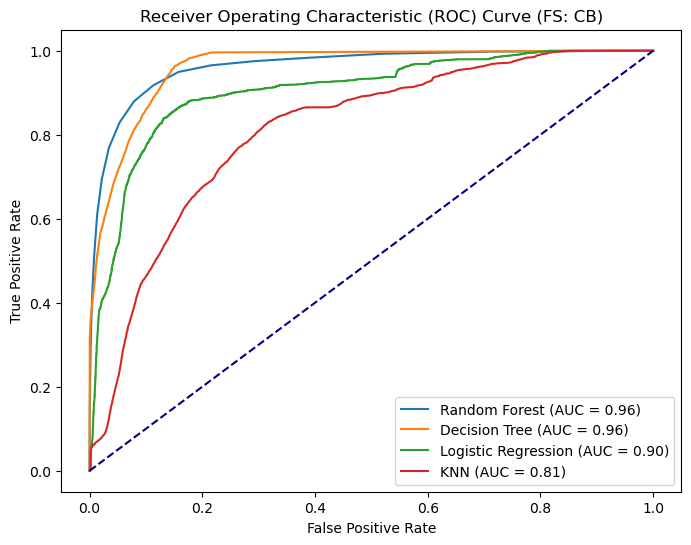

In [106]:
# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(), y_pred_proba_rf.ravel())
auc_RF = auc(fpr_rf, tpr_rf)
print(f"Random Forest AUC: {auc_RF}")

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(), y_pred_proba_DT.ravel())
auc_DT = auc(fpr_dt, tpr_dt)
print(f"Decision Tree AUC: {auc_DT}")

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(), y_pred_proba_LR.ravel())
auc_LogReg = auc(fpr_lr, tpr_lr)
print(f"Logistic Regression AUC: {auc_LogReg}")

# KNN
fpr_knn, tpr_knn, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(), y_pred_proba_knn.ravel())
auc_knn = auc(fpr_knn, tpr_knn)
print(f"KNN AUC: {auc_knn}")


# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_RF:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_DT:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_LogReg:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (FS: CB)')
plt.legend(loc='lower right')
